In [39]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [41]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import RobustScaler

In [2]:
drop_cols = ["time_stamp",
             "Machine1.Zone1Temperature.C.Actual", "Machine2.Zone1Temperature.C.Actual", "Machine3.Zone1Temperature.C.Actual",
             "Machine1.Zone2Temperature.C.Actual", "Machine2.Zone2Temperature.C.Actual", "Machine3.Zone2Temperature.C.Actual",
             "Machine2.ExitZoneTemperature.C.Actual", "Machine3.ExitZoneTemperature.C.Actual",
             "Machine2.MotorAmperage.U.Actual", "Machine2.MotorRPM.C.Actual",
             "FirstStage.CombinerOperation.Temperature3.C.Actual"]

df0_indexed = pd.read_csv("../Data/df0_indexed.csv")

X0, y0 = df0_indexed.iloc[:, :42], df0_indexed.iloc[:, 42:44]

X0_reduced = X0.copy()
X0_reduced.drop(drop_cols, axis=1, inplace=True)

y0_Actual = y0.iloc[:, 0]

In [42]:
X0_transformed = RobustScaler().fit_transform(X0_reduced, y0_Actual)

In [43]:
X0_train, X0_test, y0_train, y0_test = train_test_split(X0_transformed, y0_Actual, test_size=0.3, random_state=42)

In [94]:
DecisionTreeRegModel = DecisionTreeRegressor(max_depth = 8)
DecisionTreeRegModel.fit(X0_train,y0_train)

DecisionTreeRegressor(max_depth=8)

In [95]:
y0_pred = DecisionTreeRegModel.predict(X0_test)

In [96]:
r2_score(y0_test, y0_pred)

0.8462387591259697

<Figure size 1080x345.6 with 0 Axes>

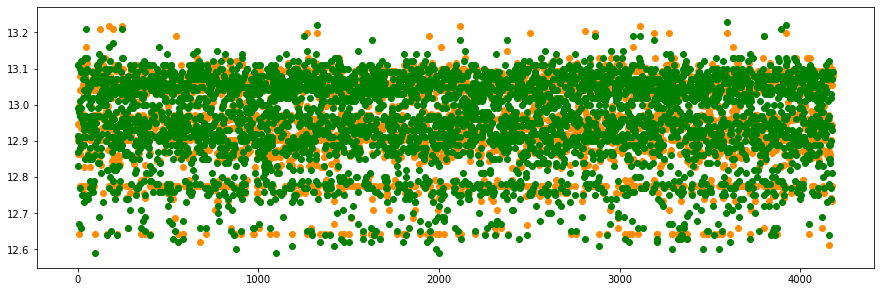

In [97]:
# test 데이터
plt.figure(figsize=(15, 4.8))
plt.scatter(np.arange(len(X0_test)), y0_pred, c="darkorange")
plt.scatter(np.arange(len(X0_test)), y0_test, c="green")

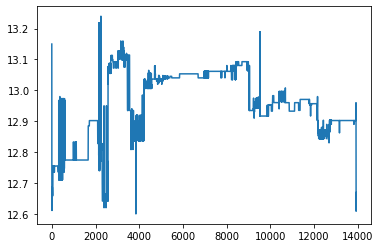

In [98]:
plt.plot(DecisionTreeRegModel.predict(X0_transformed))

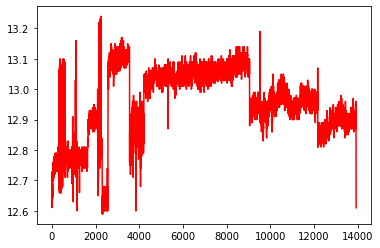

In [99]:
plt.plot(y0_Actual, "r")

In [100]:
mse = mean_squared_error(y0_test, y0_pred)
rmse = np.sqrt(mse)

mse
rmse

0.0021483545548563175

0.046350345790040416